In [0]:
import numpy as np
import os
import random
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import cv2 

faces = []
labels = []
for item in glob.iglob('/content/drive/My Drive/KDEF/training_data/*.JPG'):
    img = cv2.imread(item, cv2.IMREAD_GRAYSCALE)
    im = Image.open(item)
    label = im.filename[47:49]
    labels.append(label)
    faces.append(img)

In [0]:
shuffled = np.expand_dims(faces, axis=3)
split = int(len(shuffled) * 0.7)

training_images = shuffled[0:split]
validation_images = shuffled[split:]
training_labels = labels[0:split]
validation_labels = labels[split:]

print(shuffled.shape)
print(training_images.shape)
print(validation_images.shape)
print(np.shape(training_labels))
print(np.shape(validation_labels))

(2448, 762, 562, 1)
(1713, 762, 562, 1)
(735, 762, 562, 1)
(1713,)
(735,)


In [0]:
np.unique(training_labels)

array(['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU'], dtype='<U2')

In [0]:
np.unique(validation_labels)

array(['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU'], dtype='<U2')

In [0]:
arr1 = np.unique(training_labels)
arr1.sort()

dict1 = {}
for i in range(len(arr1)):
  dict1[arr1[i]] = i
dict1

{'AF': 0, 'AN': 1, 'DI': 2, 'HA': 3, 'NE': 4, 'SA': 5, 'SU': 6}

In [0]:
training_labels = [dict1.get(n, n) for n in training_labels]
validation_labels = [dict1.get(n, n) for n in validation_labels]

In [0]:
#LeNet-5 
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D, BatchNormalization

model1 = Sequential([
    Conv2D(6, (3, 3), activation='relu', input_shape = (762, 562, 1)),
    AveragePooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'),
    AveragePooling2D(2, 2),
    Flatten(),
    Dense(120, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(84, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(7, activation=tf.nn.softmax)])

Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#AlexNet

model2 = Sequential()

model2.add(Conv2D(filters=96, input_shape=(762,562,1), kernel_size=(11,11), strides=(4,4), padding='valid', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(4096, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(4096, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(7, activation = 'softmax'))

In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.0001)
model2.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

seed = 7
np.random.seed(seed)

from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_acc', mode='max', patience = 20)
mc = ModelCheckpoint('model_alexnet.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model2.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 188, 138, 96)      11712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 69, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 69, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 84, 59, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 29, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 42, 29, 256)       1024      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 27, 384)    

In [0]:
history = model2.fit(np.array(training_images), training_labels, validation_data= (np.array(validation_images), validation_labels), 
                     epochs = 100, callbacks= [es, mc])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1713 samples, validate on 735 samples
Epoch 1/100
1713/1713 [==============================] - 351s 205ms/step - loss: 3.0854 - acc: 0.1407 - val_loss: 3.6553 - val_acc: 0.1673

Epoch 00001: val_acc improved from -inf to 0.16735, saving model to model_alexnet.h5
Epoch 2/100
1713/1713 [==============================] - 346s 202ms/step - loss: 2.3803 - acc: 0.1693 - val_loss: 2.7855 - val_acc: 0.1619

Epoch 00002: val_acc did not improve from 0.16735
Epoch 3/100
1713/1713 [==============================] - 346s 202ms/step - loss: 2.2432 - acc: 0.1798 - val_loss: 2.0369 - val_acc: 0.1905

Epoch 00003: val_acc improved from 0.16735 to 0.19048, saving model to model_alexnet.h5
Epoch 4/100
1713/1713 [==============================] - 339s 198ms/step - loss: 2.2285 - acc: 0.1833 - val_loss: 2.1515 - val_acc: 0.2027

Epoch 00004: val_acc improved from 0.19048 to 0.20272, saving model to mod

In [0]:
training_labels[:10]

[4, 4, 2, 2, 3, 2, 3, 4, 4, 4]

In [0]:
model3.evaluate(validation_images, validation_labels)

245/245 [==============================] - 10s 41ms/sample - loss: 2.2742 - acc: 0.2980


[2.2742159493115484, 0.29795918]

In [0]:
predict = model2.predict_classes(validation_images)
print(predict)

[4 0 1 3 3 0 0 6 1 0 2 6 2 2 4 3 6 6 1 6 3 2 3 2 3 3 6 2 4 3 2 2 6 5 5 2 0
 5 3 0 6 3 0 6 3 3 4 4 2 4 0 2 3 3 1 2 3 1 2 4 3 6 5 4 6 6 1 1 2 4 6 6 0 2
 6 6 0 6 0 0 0 0 3 1 2 6 2 0 3 2 5 0 0 3 2 0 3 5 6 6 2 3 0 2 2 2 0 0 5 6 2
 2 6 1 4 0 4 2 2 2 1 2 2 1 0 2 6 6 0 2 2 6 1 1 1 6 2 6 6 2 6 0 0 6 1 0 3 4
 4 6 3 6 4 6 2 6 5 5 4 2 6 3 1 1 4 6 6 1 2 1 6 6 1 4 1 6 2 3 6 1 2 4 6 1 2
 6 0 5 2 3 2 4 3 2 2 4 2 3 4 5 1 1 4 4 1 3 2 6 6 1 6 6 4 2 6 6 1 6 6 4 4 4
 6 6 2 0 0 4 2 3 1 4 4 0 6 1 4 3 2 4 6 4 6 4 4]


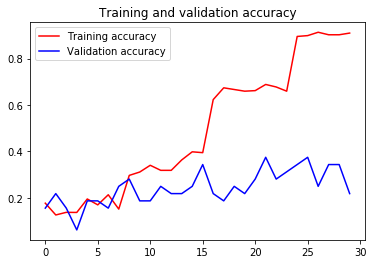

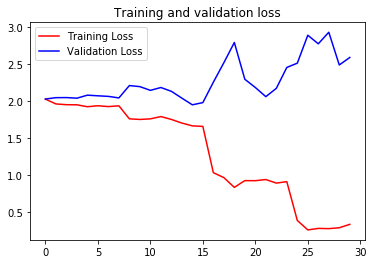

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()